# The basics of inferential statistics

## 4.1 Population and sample

### 4.1.1 Method of sampling
- Estimator 
- Estimate

        → Estimate the population through a sample

- random sampling / independent and identically distributed
- sampling with replacement
- sampling without replacement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [10]:
# random & with replacement
np.random.choice([1, 2, 3], 3)

array([1, 3, 1])

In [9]:
# random & without replacement
np.random.choice([1, 2, 3], 3, replace=False)

array([2, 1, 3])

In [19]:
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [20]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.400

In [18]:
scores.mean()

69.530

In [22]:
for i in range(5):
    #np.random.seed(1)
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 74.4
2번째 무작위 추출로 얻은 표본평균 74.65
3번째 무작위 추출로 얻은 표본평균 70.95
4번째 무작위 추출로 얻은 표본평균 71.15
5번째 무작위 추출로 얻은 표본평균 70.1


## 4.2 Probability model

### 4.2.1 Baisic of probability

- Probabilty : interprete the unpredictability
- Random variable : 취하는 값과 그 값이 나올 확률이 결정되어 있는 것 (함수)
#####
- trial 
- realization
- event 

####
- Mutually exclusive – Events cannot happen simultaneously (eg. dice number = 1)



### 4.2.2 Probability of distribution
- 확률변수가 어떻게 움직이는지를 다룬다 eg. 주사위의 경우 눈 - 확률로 이루어진 표를 생각하기
- 확률변수 X는 확률 분포 A를 따른다

In [ ]:
# Abnormal dice
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [24]:
np.random.choice(dice, p = prob)

5

In [30]:
# Try 10 times
num_trial = 100
sample = np.random.choice(dice, num_trial, p = prob)
sample

array([4, 2, 6, 3, 2, 2, 3, 4, 2, 3, 6, 5, 6, 5, 4, 6, 5, 6, 3, 5, 4, 6,
       6, 4, 6, 3, 1, 6, 4, 3, 1, 4, 6, 4, 5, 1, 4, 2, 5, 1, 4, 6, 4, 4,
       2, 5, 6, 5, 3, 4, 6, 3, 1, 6, 4, 4, 5, 2, 6, 4, 6, 3, 3, 6, 3, 6,
       5, 3, 5, 2, 1, 2, 4, 5, 6, 6, 3, 2, 3, 3, 4, 4, 5, 5, 2, 1, 6, 6,
       1, 3, 4, 4, 3, 1, 5, 2, 5, 3, 4, 5])

In [31]:
# Create histogram
freq, _ = np.histogram(sample, bins = 6, range= (1,7))
pd.DataFrame({'frequence' : freq,
              'relative frequency' : freq / num_trial},
              index = pd.Index(np.arange(1,7), name = 'dice'))

,frequence,relative frequency
dice,,
1,9,0.09
2,12,0.12
3,18,0.18
4,22,0.22
5,17,0.17
6,22,0.22


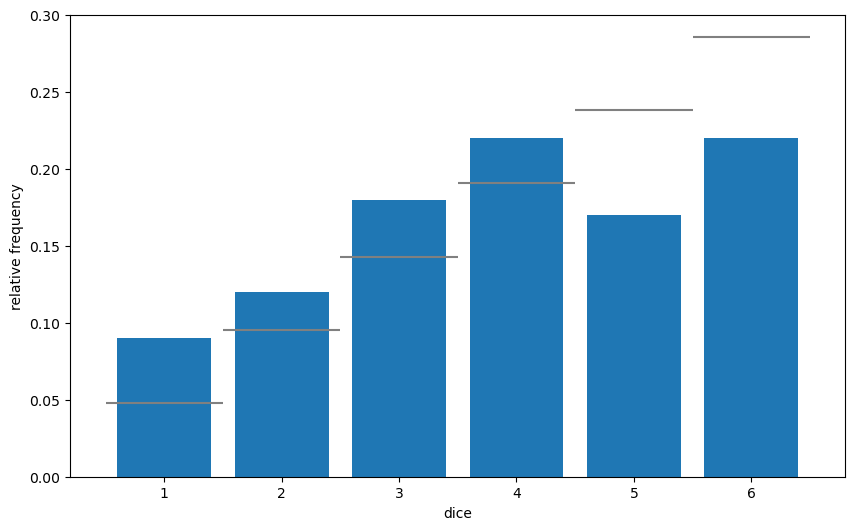

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')

# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

In [36]:
# Try 10000 times
num_trial = 10000
sample = np.random.choice(dice, num_trial, p = prob)

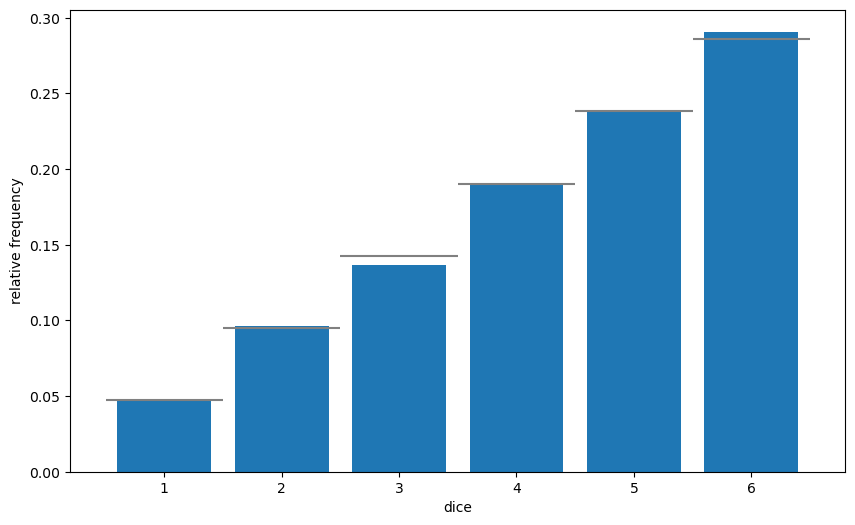

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)


ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))

ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 4.3 Probability in inferential statistics

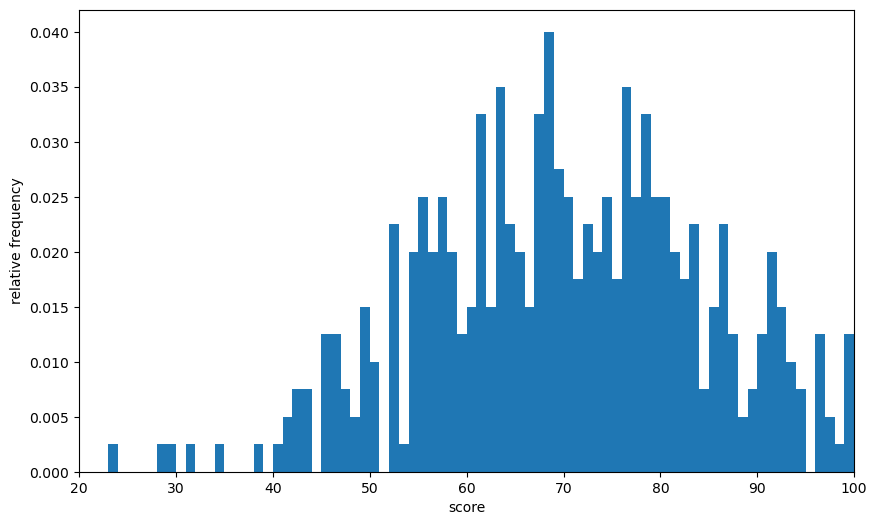

In [38]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# All students
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

- 69 Scores accounted for 4% of all students
- The relative frequency corresponds to the probability of obtaining that score
- 무작위 추출은 이와 같이 확률 분포를 따르는 확률 변수의 시행이다

In [39]:
np.random.choice(scores)

50

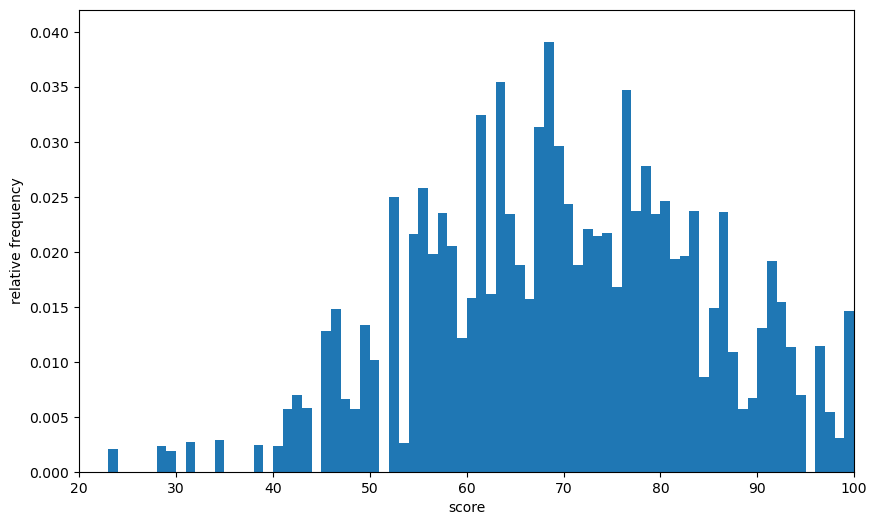

In [40]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

Law of large number
- 시행 횟수를 늘리면 상대도수 → 이론 확률에 수렴 (주사위 사례)
- 표본 크기를 늘리면 표본 분포 → 모집단 분포에 수렴 (표본추출 사례)
- 즉, 둘 다 공통적으로 **“많이 하면 할수록 실제(모집단/이론) 분포에 가까워진다”**

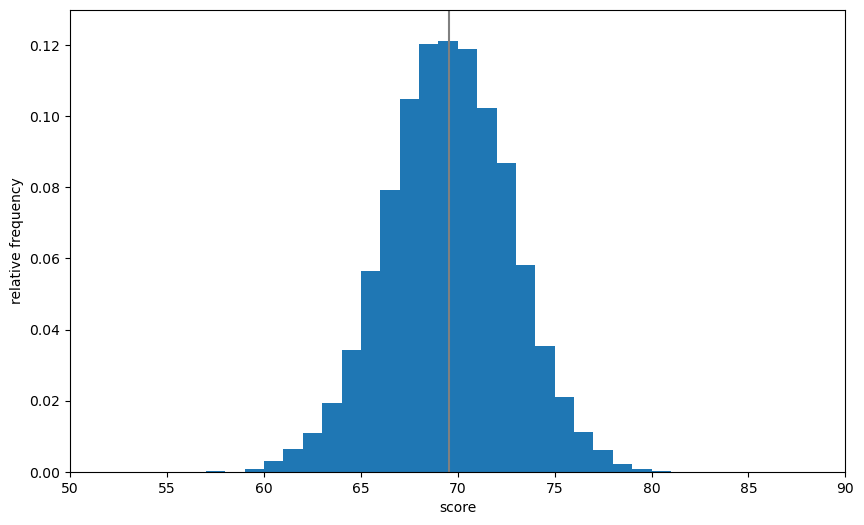

In [44]:
# 10,000 of sample mean -> check again
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()